In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

In [48]:
class Logistic(object):
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    def log_loss(self, y, output):
        return -1 * (y*np.log(output) + (1-y)*np.log(1-output))
    
    def sigmoid_cost(self, T, Y):
        return -(T*np.log(Y) + (1-T)*np.log(1-Y)).mean()

    def output_formula(self, features, weights, bias):
        return self.sigmoid(np.dot(features, weights) + bias)

    def update_weights(self, x, y, weights, bias, learn_rate):
        for index in range(len(weights)):
            weights[index] += learn_rate * (y - self.output_formula(x, weights, bias)) * x[index]
        bias += learn_rate * (y - self.output_formula(x, weights, bias))
        return weights, bias

    def plot_points(self, X, y):
        admitted = X[np.argwhere(y==1)]
        rejected = X[np.argwhere(y==0)]
        plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], color = 'blue', edgecolor = 'k', label='y=0')
        plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], color = 'red', edgecolor = 'k', label='y=1')

    def display(self, m, b, X, color='g--'):
    #         plt.xlim(-0.05,1.05)
    #         plt.ylim(-0.05,1.05)
        x = np.arange(np.amin(X[:,0]), np.amax(X[:,0]), 0.1)
        plt.plot(x, m*x+b, color, label='Decision Boundary')


    def stochastic_train(self, features, targets, epochs, learn_rate):
        np.random.seed(1)
        n_epochs = 100
        learn_rate = 0.01
        errors = []
        n_records, n_features = features.shape
        last_loss = None
        weights = np.random.normal(scale=1/n_features**0.5, size=n_features)
        bias = 0
        for e in range(n_epochs):
            del_w = np.zeros(weights.shape)
            for x,y in zip(features, targets):
                output = self.output_formula(x, weights, bias)
                error = self.log_loss(y, output)
                weights, bias = self.update_weights(x, y, weights, bias, learn_rate)

            # Printing out the log-loss error on the training set
            out = self.output_formula(features, weights, bias)

            loss = np.mean(self.log_loss(targets, out))
            errors.append(loss)
#             if e % (epochs/10) == 0:
#                 print("\n========== Epoch", e,"==========")
#                 if last_loss and last_loss < loss:
#                     print("Train loss: ", loss, "  WARNING - Loss Increasing")
#                 else:
#                     print("Train loss: ", loss)
#                 last_loss = loss
#                 predictions = out > 0.5
#                 accuracy = np.mean(predictions == targets)
#                 print("Accuracy: ", accuracy)
            if e % (epochs / 100) == 0:
                self.display(-weights[0]/weights[1], -bias/weights[1], features)

        # Plotting the solution boundary
        t = 'SGD lr='+str(learn_rate)+' epochs='+str(epochs)
        plt.title(t)
        self.display(-weights[0]/weights[1], -bias/weights[1], features, 'black')

        # Plotting the data
        self.plot_points(features, targets)
    #         self.display(-weights[0]/weights[1], -bias/weights[1], 'black')
        plt.show()

        # Plotting the error
#         plt.title("Error Plot")
#         plt.xlabel('Number of epochs')
#         plt.ylabel('Error')
#         plt.plot(errors)
#         plt.show()
        
    # Implement the forward algorithm
    def forward(self, X, w, b):
        #ADD CODE HERE...
        return self.sigmoid(np.dot(X, w) + b)
        
    def batch_train(self, X, Y, epochs=10000, step_size=10e-7):
        # Validation data set extracted from the training data
        X, Y = shuffle(X, Y)
#         Xvalid, Yvalid = X[-1000:], Y[-1000:]
#         X, Y = X[:-1000], Y[:-1000]
        N, D = X.shape        
        
        #(i) Initialize the weights W to small random numbers (variance - zero); 
        #       also initialize the bias b to zero
        #ADD CODE HERE...
        W = np.random.randn(D) / np.sqrt(1)
        b = np.zeros(1)

        #For the given number of epochs selected, learn the weights 
        train_costs = []
#         valid_costs = []
        best_validation_error = 1
        
        #(ii) Create a loop over the number of epochs specified. 
        for e in range(epochs):
            #(iii) Call the forward funcion to calculate P(Y|X)
            #ADD CODE HERE...
            pY = self.forward(X, W, b)

            #(iv) Next, learn the weights via back-propagation, by performing 
            #   gradient descent using equations (1) and (2) from the HW text
            #ADD CODE HERE...
            W -= step_size * np.dot(X.T, (pY - Y))
            b -= step_size * sum(pY - Y)

            #(v) Using both the training and validation data, compute P(Y|X) using the 
            #       forward algo. Compute the sigmoid costs and append to array costs
            #       Check to set best_validation_error 
            #ADD CODE HERE...
#             pY_valid = self.forward(Xvalid)
            train_costs.append(self.sigmoid_cost(Y, pY))
#             valid_costs.append(sigmoid_cost(Yvalid, pY_valid))
            if e % (epochs / 100) == 0:
                self.display(-W[0]/W[1], -b/W[1], X)
#         print('train costs = ', train_costs)
         # Plotting the solution boundary
        t = 'BGD lr='+str(step_size)+' epochs='+str(epochs)
        plt.title(t)
        self.display(-W[0]/W[1], -b/W[1], X, 'black')

        # Plotting the data
        self.plot_points(X, Y)
#         self.display(-W[0]/W[1], -b/W[1], 'black')
        plt.show()

#         # Plotting the error
#         plt.title("Error Plot")
#         plt.xlabel('Number of epochs')
#         plt.ylabel('Error')
#         plt.plot(train_costs)
#         plt.show()
#         best_valdation_error = min(valid_costs)
        #(vi) Print your best validation error 

    def run(self):
        X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
#         y = np.where(y==0, -1, y)
#         plt.scatter(X[:,0], X[:,1])
        n_epochs = 100
        learnrate = 0.01
        self.stochastic_train(X, y, n_epochs, learnrate)
        self.batch_train(X, y, n_epochs, learnrate)
        
        n_epochs = 100
        learnrate = 0.05
        print('(epochs, learning rate) =', (n_epochs, learnrate))
        self.stochastic_train(X, y, n_epochs, learnrate)
        self.batch_train(X, y, n_epochs, learnrate)
        
        n_epochs = 100
        learnrate = 0.001
        print('(epochs, learning rate) =', (n_epochs, learnrate))
        self.stochastic_train(X, y, n_epochs, learnrate)
        self.batch_train(X, y, n_epochs, learnrate)


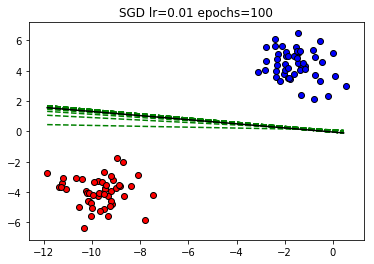

/Users/hitesh/Documents/machine learning/pytorchProjects/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/hitesh/Documents/machine learning/pytorchProjects/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


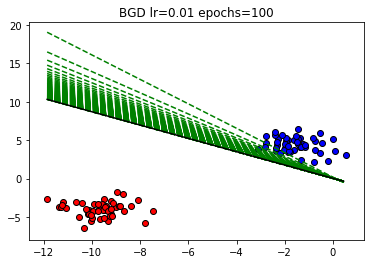

(epochs, learning rate) = (100, 0.05)


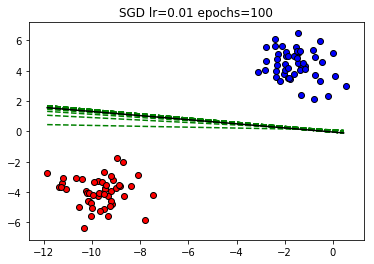

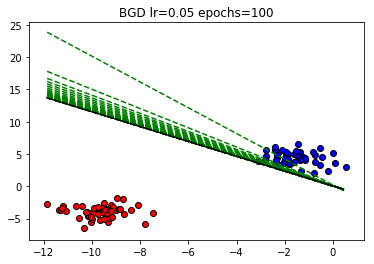

(epochs, learning rate) = (100, 0.001)


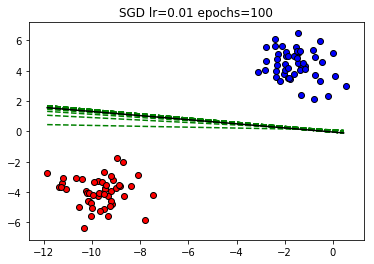

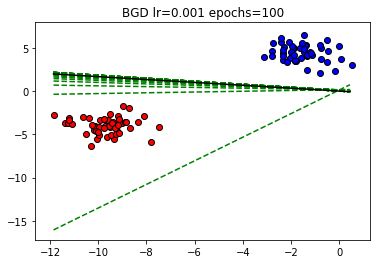

In [49]:
reg = Logistic()
reg.run()